In [37]:
# 01_eda.ipynb – Explorative Datenanalyse für CO₂-Projekt

In [38]:
# 1. Import der Standard-Bibliotheken für Datenanalyse und Visualisierung
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# 2. CSV einlesen - Rohdatensatz
df = pd.read_csv('../data/CO2_Emissions.csv')

In [40]:
# Entferne exakte Duplikate
print(f'Anzahl Zeilen vor Duplikat-Entfernung: {df.shape[0]}')
df = df.drop_duplicates()
print(f'Anzahl Zeilen nach Duplikat-Entfernung: {df.shape[0]}')

Anzahl Zeilen vor Duplikat-Entfernung: 7385
Anzahl Zeilen nach Duplikat-Entfernung: 6282


In [41]:
# 3. Erster Überblick über den Datensatz - überblick über Dimensionen, Spaltentypen und erste Zeilen
print("Shape:", df.shape)
print(df.dtypes)
print(df.head())

Shape: (6282, 12)
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5

In [42]:
# 4. Fehlende Werte prüfen - prüft auf Lücken in den Daten, was wichtig fir Modellverwendung ist
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


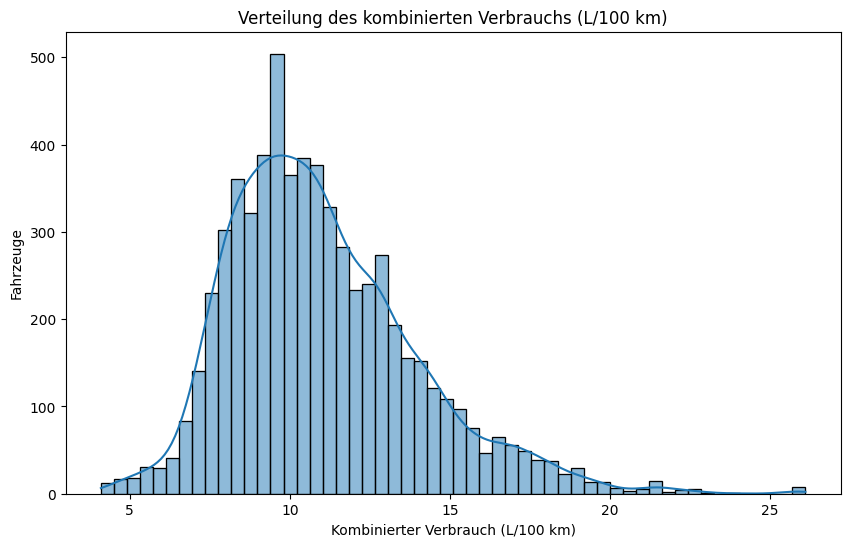

In [43]:
# 5. Zielvariable analysieren - Histogramm der Verbrauchswerte, damit Verteilung geprüft wird, Normalitäten erkennt werden und Ausreisser identifiziert werden können
plt.figure(figsize=(10, 6))
sns.histplot(df['Fuel Consumption Comb (L/100 km)'], kde=True)
plt.title('Verteilung des kombinierten Verbrauchs (L/100 km)')
plt.xlabel('Kombinierter Verbrauch (L/100 km)')
plt.ylabel('Fahrzeuge')
plt.show()

In [44]:
# Ausreiser entfernen - Entfernt Fahrzeuge mit extrem hohem oder niedrigem Verbrauchswerten
df = df[(df['Fuel Consumption Comb (L/100 km)'] > 2) & (df['Fuel Consumption Comb (L/100 km)'] < 25)]

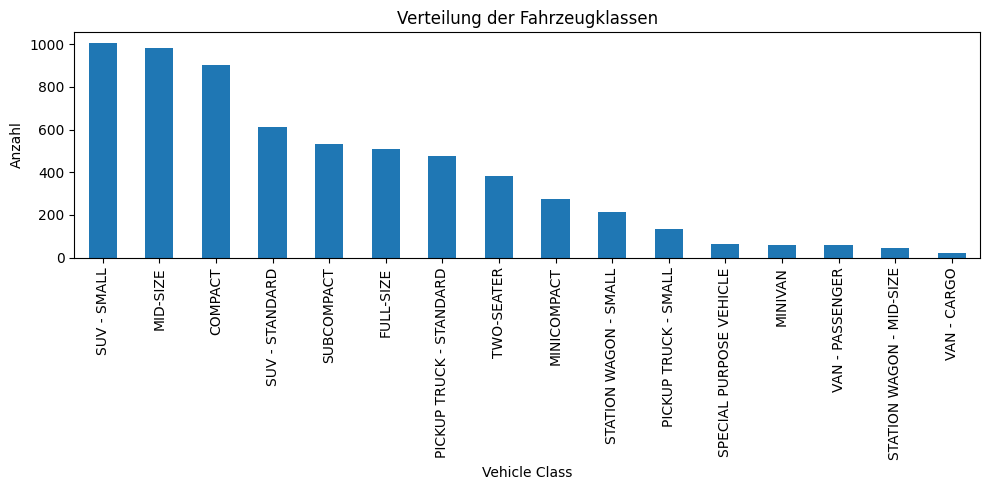

In [45]:
# 6. Fahrzeugklassen zählen - Wie häufig sind verschiedene Fahrzeugklassen im Datensatz vertreten? - Wichtig für Segmentbildung und Gewichtung
plt.figure(figsize=(10, 5))
df['Vehicle Class'].value_counts().plot(kind='bar')
plt.title('Verteilung der Fahrzeugklassen')
plt.xticks(rotation=90)
plt.ylabel('Anzahl')
plt.tight_layout()
plt.show()

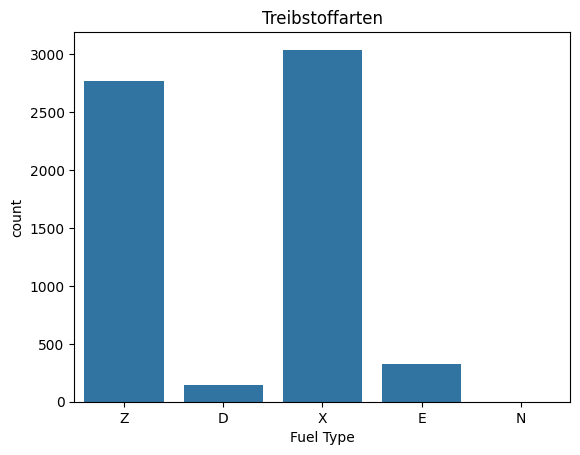

In [46]:
# 7. Überblick Fuel Type - Übersicht der Treibstoffarten im Datensatz
sns.countplot(x='Fuel Type', data=df)
plt.title('Treibstoffarten')
plt.show()

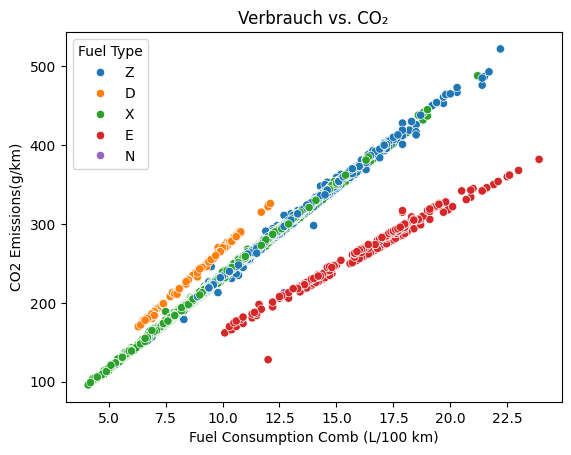

In [47]:
# 8. Verbrauch vs CO₂ - Veranschaulichung linearen Zusammenhangs zwischen Verbrauch und CO₂-Emissionen
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', data=df)
plt.title('Verbrauch vs. CO₂')
plt.show()


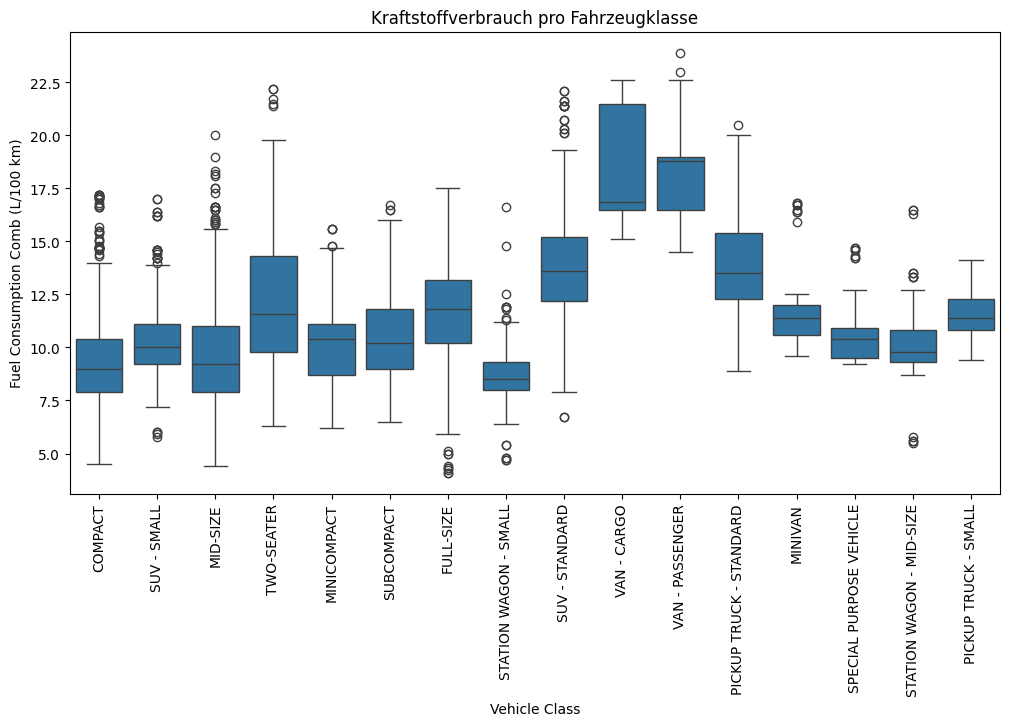

In [48]:
# 9. Streuung und Median-Verbrauch nach Fahrzeugklasse - Für Segmentierung und Vergleich der Fahrzeugklassen
plt.figure(figsize=(12,6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.xticks(rotation=90)
plt.title('Kraftstoffverbrauch pro Fahrzeugklasse')
plt.show()


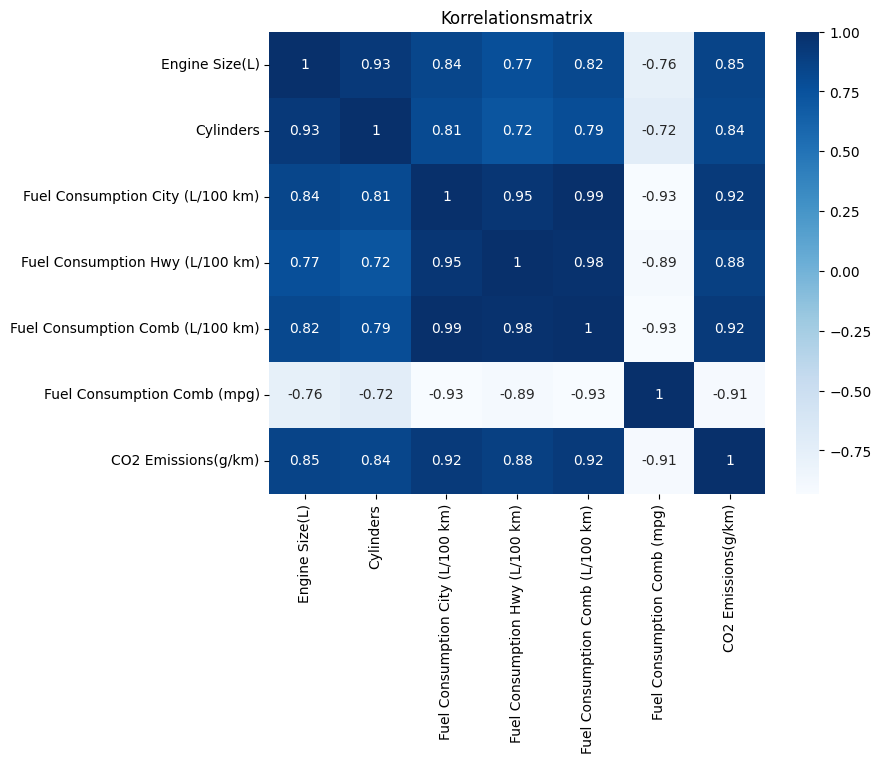

In [49]:
# 10. Korellationsmatrix - Überprüfung der Korrelationen zwischen numerischen Variablen, um Zusammenhänge zu erkennen - Für Feature Auswahl
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Korrelationsmatrix')
plt.show()


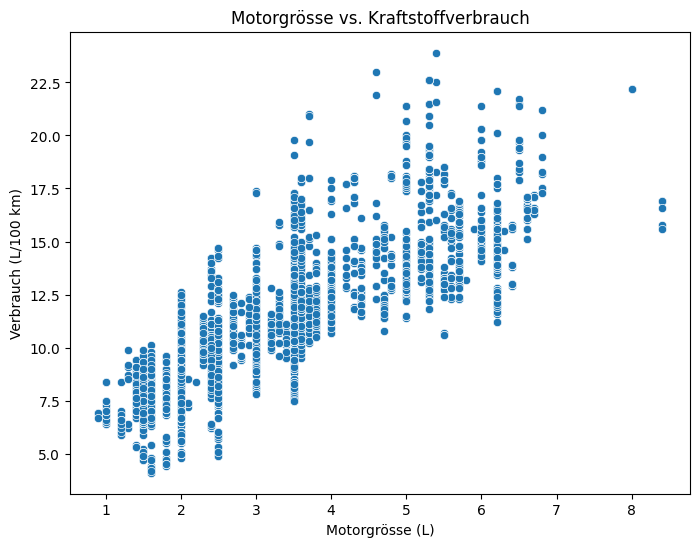

In [50]:
# 11. Verbrauch vs. Motorgrösse - Zeigt den Zusammenhang zwischen Motorgrösse und Kraftstoffverbrauch - Wichtig für Feature Engineering
plt.figure(figsize=(8,6))
sns.scatterplot(x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Motorgrösse vs. Kraftstoffverbrauch')
plt.xlabel('Motorgrösse (L)')
plt.ylabel('Verbrauch (L/100 km)')
plt.show()


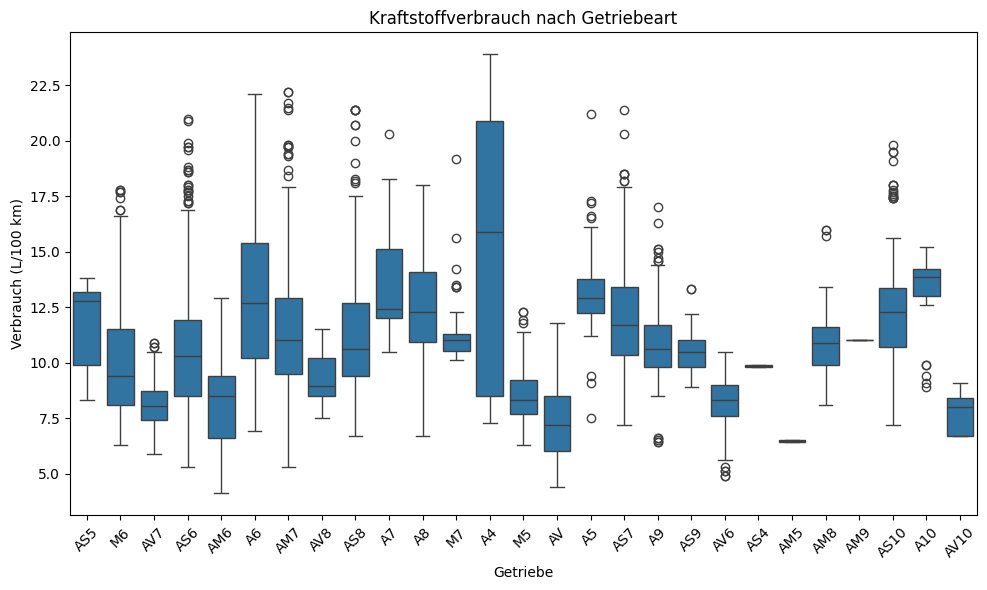

In [51]:
# 12. Verbrauch nach Getriebeart – Zeigt, ob manuelle/automatische Getriebe sparsamer sind
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.xticks(rotation=45)
plt.title('Kraftstoffverbrauch nach Getriebeart')
plt.xlabel('Getriebe')
plt.ylabel('Verbrauch (L/100 km)')
plt.tight_layout()
plt.show()


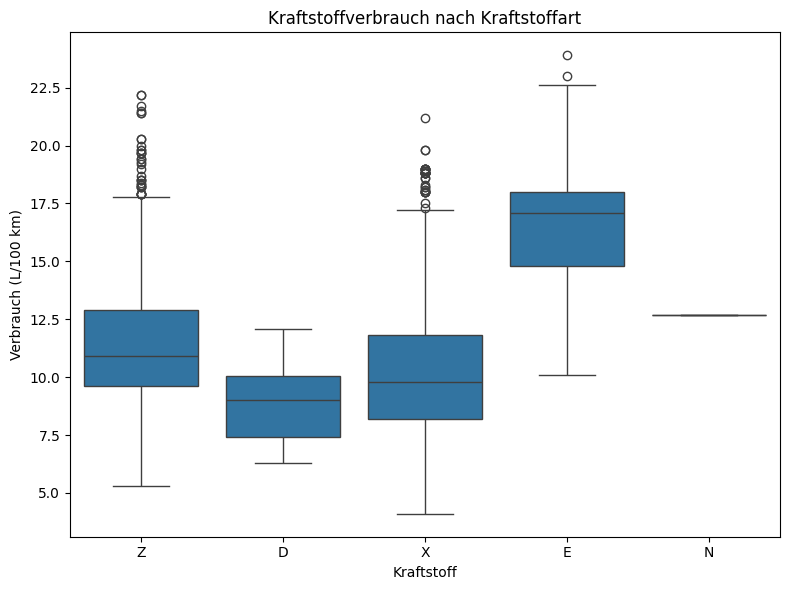

In [52]:
# 13. Verbrauch nach Kraftstoffart – Welche Fuel Types verbrauchen wie viel?
plt.figure(figsize=(8,6))
sns.boxplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Kraftstoffverbrauch nach Kraftstoffart')
plt.xlabel('Kraftstoff')
plt.ylabel('Verbrauch (L/100 km)')
plt.tight_layout()
plt.show()


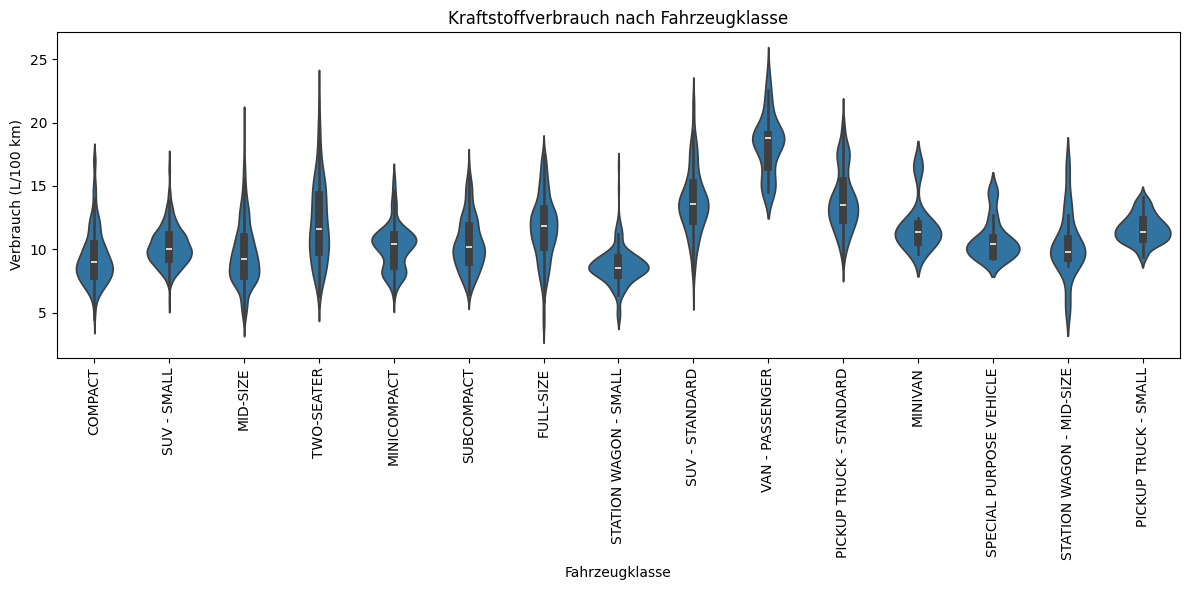

In [53]:
# Nur Fahrzeugklassen mit mindestens 30 Einträgen verwenden
top_classes = df['Vehicle Class'].value_counts()[df['Vehicle Class'].value_counts() > 30].index
df_filtered = df[df['Vehicle Class'].isin(top_classes)]

# 14. Verbrauch nach Fahrzeugklasse – Violinplot
plt.figure(figsize=(12,6))
sns.violinplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Kraftstoffverbrauch nach Fahrzeugklasse')
plt.xlabel('Fahrzeugklasse')
plt.ylabel('Verbrauch (L/100 km)')
plt.tight_layout()
plt.show()


In [54]:
# 15. Export für Feature Engineering - Speichert den bereinigten und analysierten Datensatz für die weitere Verwendung in der Feature-Engineering-Phase
df.to_csv('../data/model_input.csv', index=False)
